# **Decision Trees**

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for viewing this notebook:

````
jt -t grade3 -cellw=90% -fs=14 -tfs=14 -ofs=14
````

In [1]:
%pylab inline
import pickle, sys

sys.path.append('../util')
from data_handling import extractExamplesFromList, findUniqueRowsAndCount
from viz import showMatches, bw, rw, rwb, testLogicalRules
from data_handling import extractFeatures
from image import makeGrayScale

Populating the interactive namespace from numpy and matplotlib


## Load up Data

In [2]:
#Load data:
with open('../data/training_data.p', 'rb') as f:
    data = pickle.load(f)

In [3]:
#Let's pick a few examples to experiment with:
exampleIndices = [0, 1, 2]

#Examples we didn't train on:
testingExampleIndices = [3, 4]

In [4]:
# Extract 9x9 example grids and correct labels from our 3 images:
examples = [data[index] for index in exampleIndices]
X, y = extractExamplesFromList(examples, whichImage = 'image1bit', dist = 4)

In [5]:
X.shape

(7867, 81)

In [6]:
y.shape

(7867,)

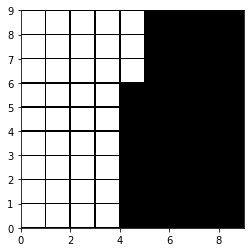

In [7]:
#Visualize random training example
exampleToShow = X[600,:].reshape(9,9)
fig = figure(0, (4,4))
pcolor(flipud(exampleToShow), cmap = 'Greys',  linewidth =.5, color = 'k', vmin = 0, vmax = 1)

## Let's use scikit learn's decision tree implementation

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [11]:
clf = clf.fit(X, y)

Visuazling is a little more complicated.

/Users/stephenwelch/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


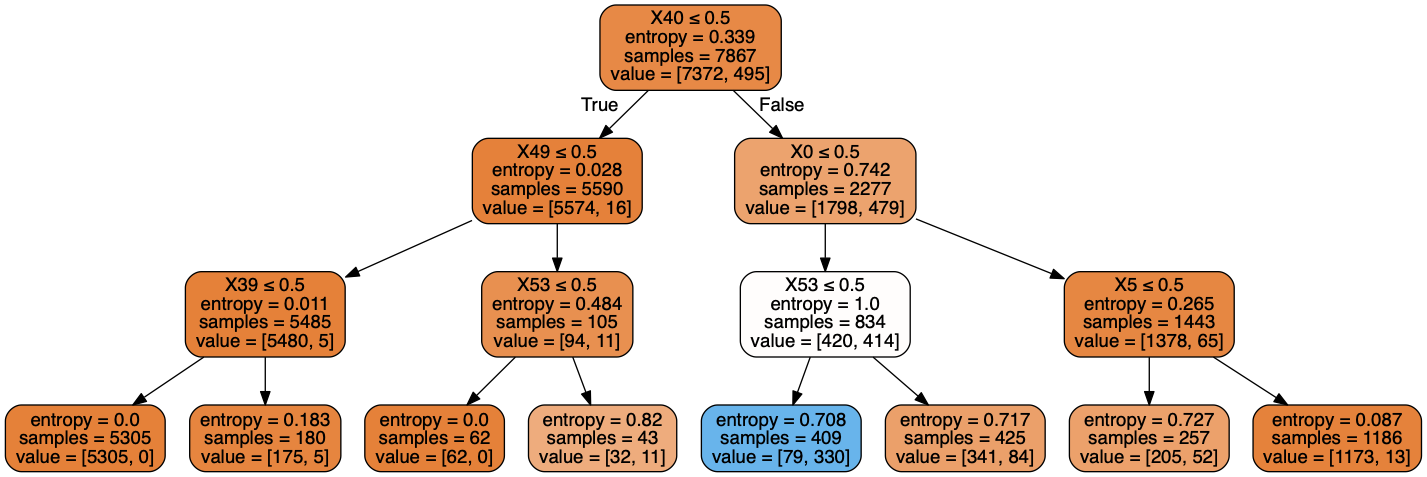

In [12]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

---

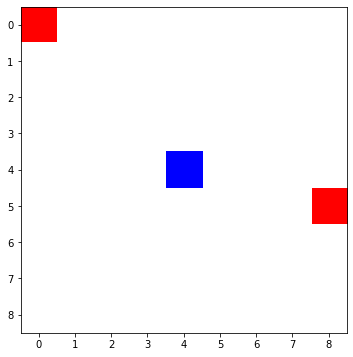

In [13]:
treeRule1 = lambda X: np.logical_and(np.logical_and(X[:, 40] == 1, X[:,0] == 0), X[:, 53] == 0)

ruleVector = np.zeros(81)
ruleVector[40] = 1; ruleVector[0] = -1; ruleVector[53] = -1

fig = figure(0, (6,6))
imshow(ruleVector.reshape(9,9), interpolation = 'none', cmap = rwb)

Confusion Matrix:
[[ 330  165]
 [  79 7293]]
Recall (TPR) = 0.667 (Portion of fingers that we "caught")
Precision (PPV) = 0.807(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.969


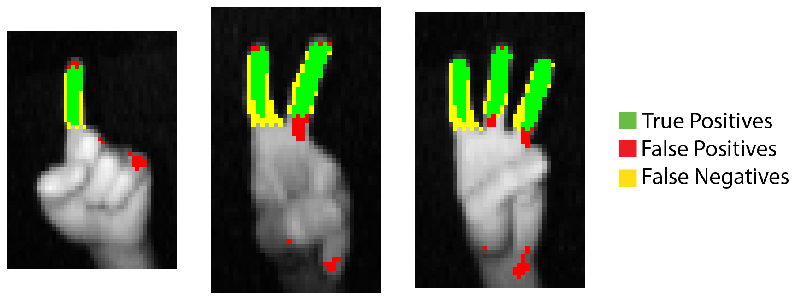

In [14]:
fig = figure(0, (14, 8))
testLogicalRules(exampleIndices, data, fig, X, y, treeRule1)

Pretty good! How do we do on testing data?

In [15]:
# Extract 9x9 example grids and correct labels from our 3 images:
examples = [data[index] for index in testingExampleIndices]
X, y = extractExamplesFromList(examples, whichImage = 'image1bit', dist = 4)

Confusion Matrix:
[[ 205  191]
 [  65 4840]]
Recall (TPR) = 0.518 (Portion of fingers that we "caught")
Precision (PPV) = 0.759(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.952


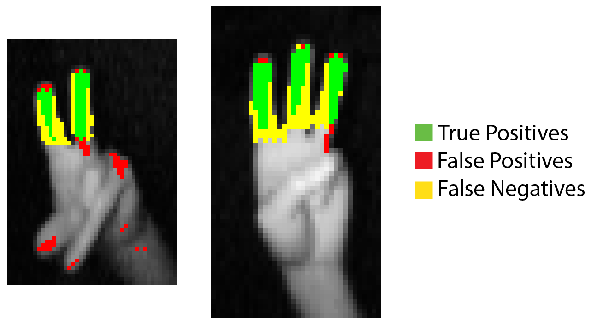

In [17]:
fig = figure(0, (14, 8))
testLogicalRules(testingExampleIndices, data, fig, X, y, treeRule1)

Pretty good!